# WRAPPER & LIBRARIES

## INSTALLING WRAPPER & LIBRARIES

In [191]:
# pip install python-steam-api
# pip install googletrans==4.0.0-rc1

# Un wrapper en Python est une couche d'abstraction qui facilite l'utilisation d'une fonctionnalité ou d'une API externe dans votre programme Python en fournissant une interface plus simple 
# et en gérant les détails d'interaction avec cette fonctionnalité externe.

## LOADING LIBRARIES

In [192]:
# **************************************************************************************
# LIBRARIES ****************************************************************************
# **************************************************************************************

# General-purpose libraries for operating system interactions, JSON data manipulation, and date/time handling.
import os  # Interact with the operating system
import json  # Work with JSON data
from random import randint  # Generate random integers
from time import sleep  # Introduce delays in code execution

from datetime import datetime, timedelta  # Manipulate dates and times
# **************************************************************************************

# Fundamental scientific computing libraries like NumPy and Pandas.
import numpy as np  # Fundamental package for scientific computing
import pandas as pd  # Data manipulation library
# **************************************************************************************

# **************************************************************************************
# **************************************************************************************

# Specialized libraries for scientific computing, namely SciPy
import scipy  # Scientific computing and technical computing library
import scipy.stats as st
import math

# **************************************************************************************

# Web-related tasks, such as making HTTP requests, parsing HTML/XML data, and web scraping
import requests  # Perform HTTP requests
from bs4 import BeautifulSoup  # Parse HTML and XML data
# **************************************************************************************

#String operations
import regex as re
import string
from nltk.corpus import stopwords

# Pretty-print Python data structures
import pprint
# **************************************************************************************

# Visualization oriented
import matplotlib.pyplot as plt  # Create static visualizations
import seaborn as sns  # Statistical data visualization
from plotly import express as px  # Create interactive plots and charts

# **************************************************************************************
# **************************************************************************************

# Machine learning : preprocessing, dimensionality reduction, one-hot encoding, and clustering
import sklearn  # Machine learning library

from sklearn import svm

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import OneHotEncoder  # One-hot encode categorical features
from sklearn.preprocessing import StandardScaler  # Standardize features
from sklearn.preprocessing import MinMaxScaler  # Standardize features


from sklearn.decomposition import PCA  # Perform dimensionality reduction
from sklearn.cluster import KMeans  # Perform clustering

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
)


#Handling Imbalanced Datasets
import imblearn  # Handle imbalanced datasets in machine learning

# **************************************************************************************
# **************************************************************************************

#Web Scraping
import scrapy  # Web scraping framework

#Saving Stuff
import pickle

# Translating
from googletrans import Translator

#Deep Learning
# import pytorch  # Deep learning library



# **************************************************************************************
# FUNCTIONS ****************************************************************************
# **************************************************************************************

#from functions import <name of function here>
from model_scoring import scoring

# ***************************** PART I - ML *********************************

## Preparing the adequate Dataframe for ML operations

### Loading our Games Database

In [254]:
data = pd.read_csv('../CSVs_Docs/steam.csv')

In [255]:
df = data

In [256]:
df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

### Exploding "genres" and "steamspy_tags" in order to be able to Scale them afterwards

#### Exploding "genres"

In [258]:
game_genres_df = df[['appid', 'genres']].copy()

In [259]:
# Split and explode
game_genres_df["genres"] = game_genres_df["genres"].str.split(";")
reindexed_game_genres_df = game_genres_df.explode("genres")

# Create pivot table
game_genres_pivot_df = reindexed_game_genres_df.groupby(['appid', 'genres']).size().apply(lambda x: 1 if x > 0 else 0).unstack(fill_value=0)
game_genres_pivot_df.reset_index(inplace=True)

# Merge game_genres_pivot_df with df, keeping all rows from both
game_genres_merged_df = pd.merge(df, game_genres_pivot_df, on='appid', how='outer')

# List column names from the original DataFrame and the merged genre columns
original_columns = df.columns.tolist()
genre_columns = [col for col in game_genres_merged_df.columns if col not in original_columns]

# Arrange the columns so that the genre columns come immediately after 'genres'
final_column_order = original_columns[:original_columns.index('genres')+1] + genre_columns + original_columns[original_columns.index('genres')+1:]
game_genres_merged_df = game_genres_merged_df[final_column_order]

game_genres_merged_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Violent,Web Publishing,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,0,0,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


#### Exploding "steamspy_tags" from game_genres_merged_df

In [260]:
game_steamspy_tags_df = game_genres_merged_df[['appid', 'steamspy_tags']].copy()

In [261]:
# Split and explode
game_steamspy_tags_df["steamspy_tags"] = game_steamspy_tags_df["steamspy_tags"].str.split(";")
reindexed_steamspy_tags_df = game_steamspy_tags_df.explode("steamspy_tags")

# Create pivot table
game_steamspy_tags_pivot_df = reindexed_steamspy_tags_df.pivot(index='appid', columns='steamspy_tags', values='steamspy_tags')
game_steamspy_tags_pivot_df = game_steamspy_tags_pivot_df.notnull().astype('int')
game_steamspy_tags_pivot_df.reset_index(inplace=True)

# Merge game_steamspy_tags_pivot_df with df, keeping all rows from both
game_steamspy_tags_merged_df = pd.merge(game_genres_merged_df, game_steamspy_tags_pivot_df, on='appid', how='outer')

game_steamspy_tags_merged_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Warhammer 40K,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,0,0,0,0,0,0,0,0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,0,0,0,0,0,0,1,0,0,0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,0,0,0,0,0,0,0,0


In [201]:
# Get list of column names from the original DataFrame and the merged steamspy_tags columns for checking purposes
original_columns = game_genres_merged_df.columns.tolist()

print(f"Columns in the merged DataFrame: {game_steamspy_tags_merged_df.columns.tolist()}")

Columns in the merged DataFrame: ['appid', 'name', 'release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'Accounting', 'Action_x', 'Adventure_x', 'Animation & Modeling_x', 'Audio Production_x', 'Casual_x', 'Design & Illustration_x', 'Documentary_x', 'Early Access_x', 'Education_x', 'Free to Play_x', 'Game Development_x', 'Gore_x', 'Indie_x', 'Massively Multiplayer_x', 'Nudity_x', 'Photo Editing_x', 'RPG_x', 'Racing_x', 'Sexual Content_x', 'Simulation_x', 'Software Training_x', 'Sports_x', 'Strategy_x', 'Tutorial', 'Utilities_x', 'Video Production_x', 'Violent_x', 'Web Publishing_x', 'steamspy_tags', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners', 'price', '1980s', "1990's", '2.5D', '2D', '2D Fighter', '360 Video', '3D', '3D Platformer', '3D Vision', '4 Player Local', '4X', '6DOF', 'Abstract', 'Action_y', 'Action RPG', 'Action-Adventure', 'Adventure_y', 'Agriculture', 'Aliens', '

### CSV export for checking operations

In [202]:
# scaling_ready_df = game_steamspy_tags_merged_df
# scaling_ready_df.to_csv("Check_Check.csv")

### Creating the final DataFrame we will use for ML

In [203]:
# Retrieve our latest modifications of the DataFrame and stock them in a new variable
scaling_ready_df = game_steamspy_tags_merged_df

# Identify categorical columns to drop
columns_to_drop = ['appid','name','release_date','developer','publisher','platforms','categories','genres','steamspy_tags','owners']

# Drop the categorical columns
pre_scaling_ready_df = scaling_ready_df.drop(columns=columns_to_drop)

In [204]:
kept_columns_list = pre_scaling_ready_df.columns
kept_columns_list

Index(['english', 'required_age', 'Accounting', 'Action_x', 'Adventure_x',
       'Animation & Modeling_x', 'Audio Production_x', 'Casual_x',
       'Design & Illustration_x', 'Documentary_x',
       ...
       'Warhammer 40K', 'Web Publishing_y', 'Werewolves', 'Western',
       'Word Game', 'World War I', 'World War II', 'Wrestling', 'Zombies',
       'e-sports'],
      dtype='object', length=376)

## ML Operations

### I. Performing Scaling with StandardScaler

In [205]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the DataFrame using StandardScaler
X_normalized_df = scaler.fit_transform(pre_scaling_ready_df)

# Print the original df
print("Original df:")
display(pre_scaling_ready_df.head())

# Create a DataFrame with the normalized data
scaled_df = pd.DataFrame(X_normalized_df, columns=kept_columns_list)

# Print the scaled df
print("\nScaled df:")
scaled_df.head()

Original df:


,english,required_age,Accounting,Action_x,Adventure_x,Animation & Modeling_x,Audio Production_x,Casual_x,Design & Illustration_x,Documentary_x,...,Warhammer 40K,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Scaled df:


,english,required_age,Accounting,Action_x,Adventure_x,Animation & Modeling_x,Audio Production_x,Casual_x,Design & Illustration_x,Documentary_x,...,Warhammer 40K,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,0.138696,-0.147507,-0.014888,1.128998,-0.767221,-0.054096,-0.032745,-0.778072,-0.056777,-0.006077,...,-0.032745,-0.018235,-0.010527,-0.029158,-0.019222,-0.029158,-0.069460,-0.017192,-0.076615,-0.008595
1,0.138696,-0.147507,-0.014888,1.128998,-0.767221,-0.054096,-0.032745,-0.778072,-0.056777,-0.006077,...,-0.032745,-0.018235,-0.010527,-0.029158,-0.019222,-0.029158,-0.069460,-0.017192,-0.076615,-0.008595
2,0.138696,-0.147507,-0.014888,1.128998,-0.767221,-0.054096,-0.032745,-0.778072,-0.056777,-0.006077,...,-0.032745,-0.018235,-0.010527,-0.029158,-0.019222,-0.029158,14.396848,-0.017192,-0.076615,-0.008595
3,0.138696,-0.147507,-0.014888,1.128998,-0.767221,-0.054096,-0.032745,-0.778072,-0.056777,-0.006077,...,-0.032745,-0.018235,-0.010527,-0.029158,-0.019222,-0.029158,-0.069460,-0.017192,-0.076615,-0.008595
4,0.138696,-0.147507,-0.014888,1.128998,-0.767221,-0.054096,-0.032745,-0.778072,-0.056777,-0.006077,...,-0.032745,-0.018235,-0.010527,-0.029158,-0.019222,-0.029158,-0.069460,-0.017192,-0.076615,-0.008595


### Performing PCA on our StandardScaled DataFrame

In [206]:
# Perform PCA on our normalized data : prepare our PCA and fit it on our data
pca = PCA(n_components=10)
pca.fit(X_normalized_df)


# Get the contribution of each principal component to the data variance
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained variance ratio:")
print(explained_variance_ratio)


# Calculate the cumulative sum of explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("\nCumulative variance ratio:")
print(cumulative_variance_ratio)

Explained variance ratio:
[0.0153286  0.00857139 0.00810825 0.00754178 0.00709769 0.00674442
 0.00645386 0.00634982 0.00602852 0.00584389]

Cumulative variance ratio:
[0.0153286  0.02389999 0.03200824 0.03955003 0.04664772 0.05339214
 0.059846   0.06619583 0.07222434 0.07806824]


### II. Performing Scaling with MinMaxScaler

In [207]:
# Create an instance of StandardScaler
scaler = MinMaxScaler()

# Standardize the DataFrame using StandardScaler
X_normalized_df = scaler.fit_transform(pre_scaling_ready_df)

# Print the original df
print("Original df:")
display(pre_scaling_ready_df.head())

# Create a DataFrame with the normalized data
scaled_df = pd.DataFrame(X_normalized_df, columns=kept_columns_list)

# Print the scaled df
print("\nScaled df:")
scaled_df.head()

Original df:


,english,required_age,Accounting,Action_x,Adventure_x,Animation & Modeling_x,Audio Production_x,Casual_x,Design & Illustration_x,Documentary_x,...,Warhammer 40K,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Scaled df:


,english,required_age,Accounting,Action_x,Adventure_x,Animation & Modeling_x,Audio Production_x,Casual_x,Design & Illustration_x,Documentary_x,...,Warhammer 40K,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Performing PCA on our MinMaxScaled DataFrame

In [208]:
# Perform PCA on our normalized data : prepare our PCA and fit it on our data
pca = PCA(n_components=10)
pca.fit(X_normalized_df)


# Get the contribution of each principal component to the data variance
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained variance ratio:")
print(explained_variance_ratio)


# Calculate the cumulative sum of explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("\nCumulative variance ratio:")
print(cumulative_variance_ratio)

Explained variance ratio:
[0.14103224 0.11902066 0.11288136 0.0832511  0.05879911 0.05652533
 0.05131095 0.04390714 0.03035478 0.01875114]

Cumulative variance ratio:
[0.14103224 0.26005289 0.37293426 0.45618536 0.51498446 0.57150979
 0.62282075 0.66672789 0.69708267 0.71583382]


### Finding out the best number of Clusters to use with the Elbow Method

Training a K-Means model with 50 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 100 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 200 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 400 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 500 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal K')

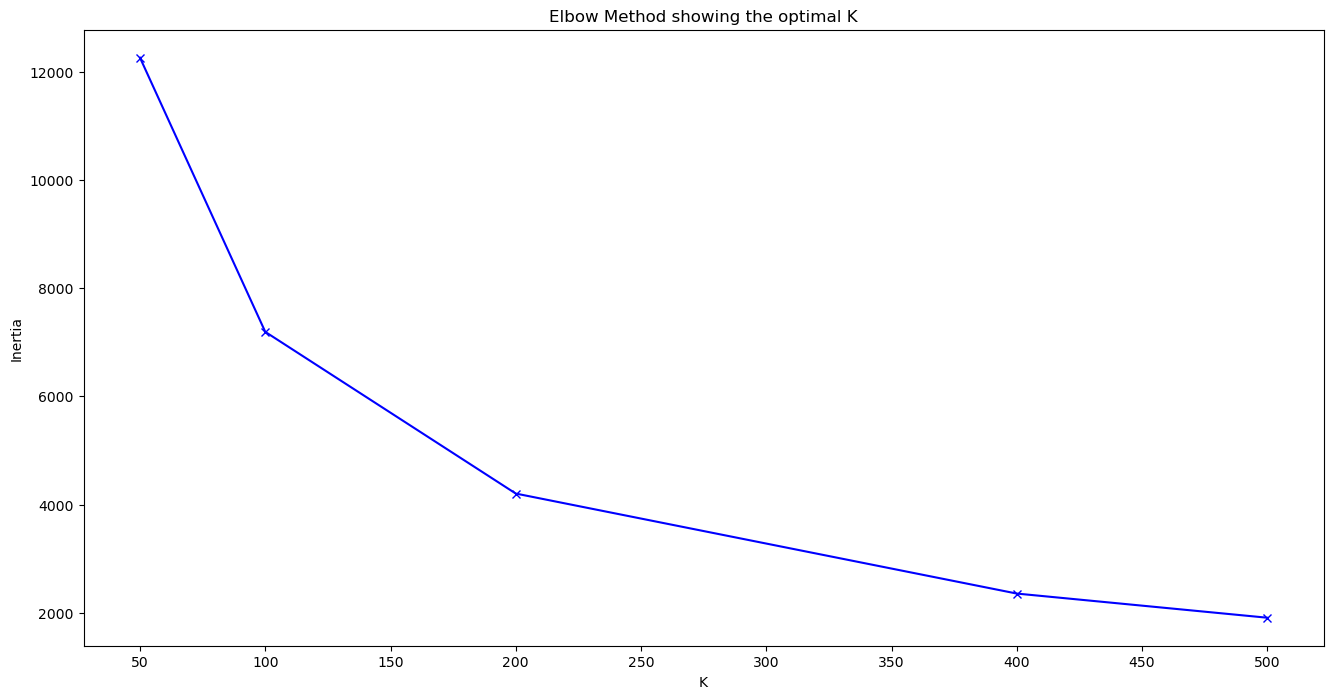

In [209]:
# Trying with a different number clusters
K = [50, 100, 200, 400, 500] 
inertia = []

X_pca = pca.transform(X_normalized_df) 


for k in K: #for every df in set build a inertia
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Just plot it
plt.figure(figsize=(16,8))
plt.plot(K, inertia, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.xticks(np.arange(min(K), max(K)+1, 50))
plt.title("Elbow Method showing the optimal K")

Training a K-Means model with 500 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 600 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 700 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 800 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 900 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 1000 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal K')

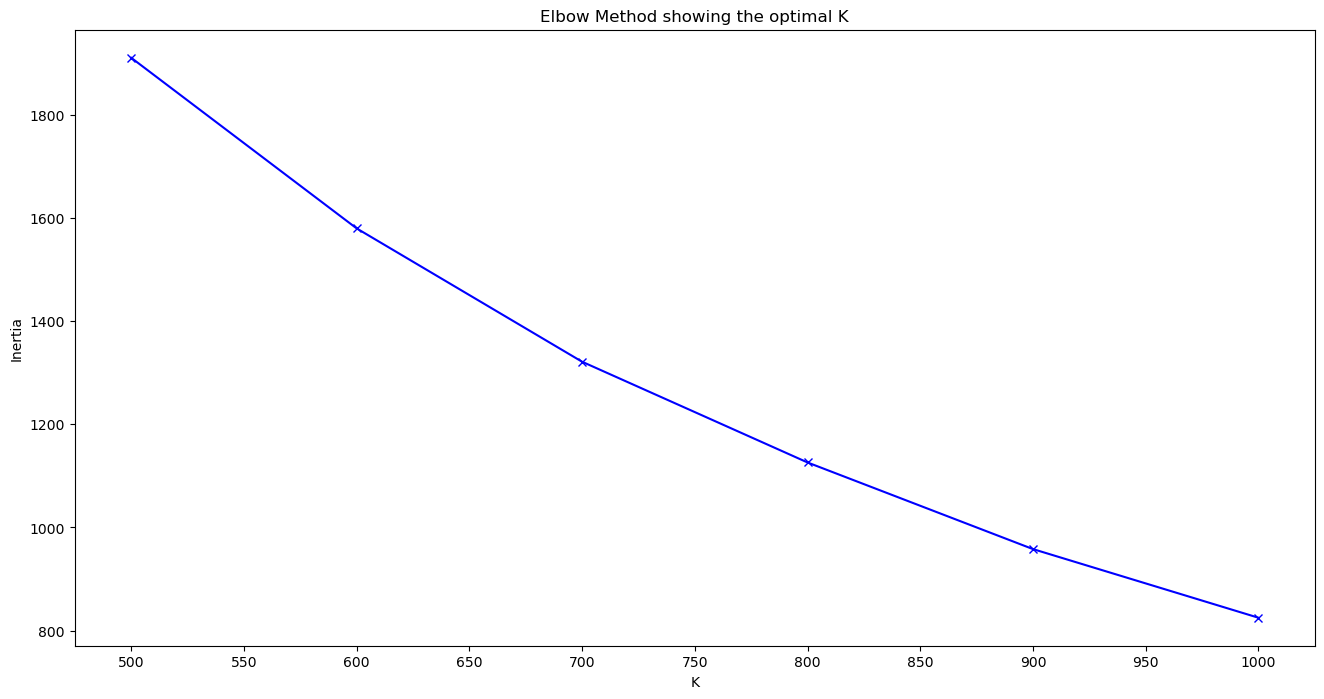

In [210]:
# Trying with a different number cluster
K = [500, 600, 700, 800, 900, 1000]
inertia = []

X_pca = pca.transform(X_normalized_df)


for k in K: #for every df in set build a inertia
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Just plot it
plt.figure(figsize=(16,8))
plt.plot(K, inertia, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.xticks(np.arange(min(K), max(K)+1, 50))
plt.title("Elbow Method showing the optimal K")

### Clustering with KMeans algorithm from PCA fitted data

In [211]:
# Take results of PCA
X_pca = pca.transform(X_normalized_df)

# Apply K-means clustering to the transformed data
kmeans = KMeans(n_clusters=500, n_init=12)
kmeans.fit(X_pca)
cluster_ids = kmeans.predict(X_pca)
cluster_distances = kmeans.transform(X_pca)

# Print the cluster IDs and distances
print("\nCluster IDs:")
print(cluster_ids)
print("\nCluster distances:")
print(cluster_distances)


Cluster IDs:
[ 8  8 96 ...  2 10 10]

Cluster distances:
[[1.38354856 2.49871467 2.02881968 ... 2.57795536 2.06355591 2.87355815]
 [1.38353547 2.49863022 2.02865929 ... 2.57804863 2.0635637  2.87355026]
 [1.52637103 2.17548502 2.14553868 ... 2.35527181 1.72415211 2.55991222]
 ...
 [2.40505998 2.45494315 0.00352233 ... 3.15085477 2.82683122 2.49832125]
 [3.12256314 1.41322319 1.99270605 ... 3.09640637 2.12429385 2.49079798]
 [3.12256313 1.41322319 1.99270605 ... 3.09640636 2.12429385 2.49079798]]


In [214]:
# Cluster-counting - if needed

from collections import Counter

cluster_counts = Counter(cluster_ids)
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} occurrences")

Cluster 48: 792 occurrences
Cluster 105: 61 occurrences
Cluster 282: 20 occurrences
Cluster 548: 15 occurrences
Cluster 300: 31 occurrences
Cluster 675: 11 occurrences
Cluster 351: 582 occurrences
Cluster 25: 331 occurrences
Cluster 291: 39 occurrences
Cluster 30: 455 occurrences
Cluster 60: 251 occurrences
Cluster 49: 151 occurrences
Cluster 20: 66 occurrences
Cluster 316: 20 occurrences
Cluster 2: 1064 occurrences
Cluster 22: 12 occurrences
Cluster 424: 12 occurrences
Cluster 55: 186 occurrences
Cluster 387: 24 occurrences
Cluster 33: 153 occurrences
Cluster 459: 13 occurrences
Cluster 149: 102 occurrences
Cluster 66: 26 occurrences
Cluster 147: 81 occurrences
Cluster 14: 482 occurrences
Cluster 18: 486 occurrences
Cluster 666: 7 occurrences
Cluster 99: 101 occurrences
Cluster 32: 110 occurrences
Cluster 560: 11 occurrences
Cluster 622: 14 occurrences
Cluster 12: 1799 occurrences
Cluster 86: 73 occurrences
Cluster 402: 15 occurrences
Cluster 515: 16 occurrences
Cluster 520: 382 occur

### Use the model with the best K to assign each observation in your data frame to its cluster number using model.predict (add cluster columns to the pandas data frame)



### Assigning a cluster to each game

In [215]:
scaled_df['cluster'] = cluster_ids
scaled_df

,english,required_age,Accounting,Action_x,Adventure_x,Animation & Modeling_x,Audio Production_x,Casual_x,Design & Illustration_x,Documentary_x,...,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports,cluster
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,105
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
27071,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
27072,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
27073,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11


In [216]:
final_df = pd.merge(scaling_ready_df[['appid','name','release_date','developer','publisher','platforms','categories','genres','steamspy_tags','owners']], scaled_df, left_index=True, right_index=True)
final_df

,appid,name,release_date,developer,publisher,platforms,categories,genres,steamspy_tags,owners,...,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports,cluster
0,10,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,10000000-20000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
1,20,Team Fortress Classic,1999-04-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,5000000-10000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
2,30,Day of Defeat,2003-05-01,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,5000000-10000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,105
3,40,Deathmatch Classic,2001-06-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,5000000-10000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
4,50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,5000000-10000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,SHEN JIAWEI,SHEN JIAWEI,windows,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,0-20000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
27071,1065570,Cyber Gun,2019-04-23,Semyon Maximov,BekkerDev Studio,windows,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0-20000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
27072,1065650,Super Star Blast,2019-04-24,EntwicklerX,EntwicklerX,windows,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,0-20000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,Yustas Game Studio,Alawar Entertainment,windows;mac,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0-20000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11


In [217]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [218]:
columns_to_keep = ["appid", "name", "release_date", "english", "developer", "publisher",
       "platforms", "required_age", "categories", "genres", "steamspy_tags",
       "achievements", "positive_ratings", "negative_ratings",
       "average_playtime", "median_playtime", "owners", "price", "cluster"]

final_df_simplified = final_df.loc[:, columns_to_keep]

In [219]:
final_df_simplified.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'cluster'],
      dtype='object')

In [220]:
final_df_simplified

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,cluster
0,10,Counter-Strike,2000-11-01,1.0,Valve,Valve,windows;mac;linux,0.0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.000000,4.709341e-02,0.006855,0.092391,0.001663,10000000-20000000,0.017038,48
1,20,Team Fortress Classic,1999-04-01,1.0,Valve,Valve,windows;mac;linux,0.0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.000000,1.254725e-03,0.001300,0.001453,0.000325,5000000-10000000,0.009455,48
2,30,Day of Defeat,2003-05-01,1.0,Valve,Valve,windows;mac;linux,0.0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0.000000,1.291784e-03,0.000817,0.000981,0.000178,5000000-10000000,0.009455,105
3,40,Deathmatch Classic,2001-06-01,1.0,Valve,Valve,windows;mac;linux,0.0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.000000,4.813939e-04,0.000548,0.001353,0.000965,5000000-10000000,0.009455,48
4,50,Half-Life: Opposing Force,1999-11-01,1.0,Gearbox Software,Valve,windows;mac;linux,0.0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0.000000,1.985324e-03,0.000591,0.003273,0.002177,5000000-10000000,0.009455,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1.0,SHEN JIAWEI,SHEN JIAWEI,windows,0.0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,0.000713,1.134471e-06,0.000000,0.000000,0.000000,0-20000,0.004953,11
27071,1065570,Cyber Gun,2019-04-23,1.0,Semyon Maximov,BekkerDev Studio,windows,0.0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0.000000,3.025256e-06,0.000002,0.000000,0.000000,0-20000,0.004005,23
27072,1065650,Super Star Blast,2019-04-24,1.0,EntwicklerX,EntwicklerX,windows,0.0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,0.002444,0.000000e+00,0.000002,0.000000,0.000000,0-20000,0.009455,7
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1.0,Yustas Game Studio,Alawar Entertainment,windows;mac,0.0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0.000000,7.563141e-07,0.000000,0.000000,0.000000,0-20000,0.012299,11


### Saving model with best K as final model using Pickle - in case

In [221]:
# meilleur_k = 500  # Remplacez par le meilleur k que vous avez sélectionné
# kmeans_final = KMeans(n_clusters=meilleur_k)

# kmeans_final.fit(X_pca)  # Remplacez X_pca par vos données normalisées

# # Définir le nom du fichier pour sauvegarder le modèle
# nom_fichier_modele = "k_means_final_model.pkl"

# # Sauvegarder le modèle avec Pickle
# with open(nom_fichier_modele, 'wb') as fichier:
#     pickle.dump(kmeans_final, fichier)

In [222]:
#  (like , DBSCAN, etc.)
# for c in np.unique(cluster_ids):

#     # For each unique cluster id, create a scatter plot of the 2D PCA-transformed data points that belong to that cluster.
#     # The scatter plot's x and y coordinates are the first and second PCA components respectively.
#     # Points belonging to the same cluster will have the same color.
#     # 'marker' sets the shape of points and 's' sets the size of points in the scatter plot.
#     plt.scatter(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], marker='.', s=10)


### Check if clustering seems OK with a scatter plot

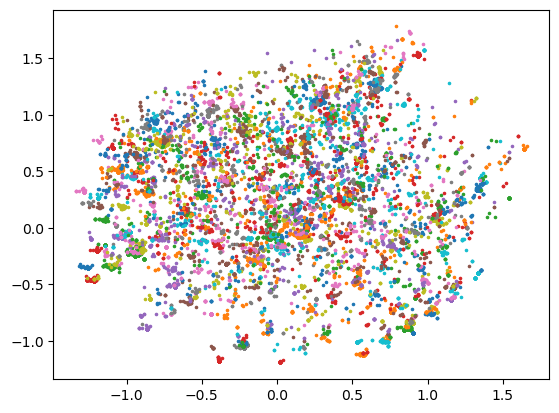

In [223]:
# Loop through all unique cluster ids obtained from K-means clustering algorithm

for c in np.unique(cluster_ids):
    plt.scatter(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], marker='.', s=10)

# ***************************** PART II - DEMO *****************************

## API Config

In [224]:
from steam import Steam  # Steam API Library
from decouple import config

# Retrieves my STEAM_API_KEY in my environnement variables
KEY = config("STEAM_API_KEY")

# Creates a class "Steam" based on the API KEY previously retrieved
steam = Steam(KEY)

### A few chained resquests to find friends of friends of friends

In [225]:
# Mine
friends_list = steam.users.get_user_friends_list("76561198084178563")
friends_list

{'friends': [{'steamid': '76561198077061193',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Blako99',
   'commentpermission': 1,
   'profileurl': 'https://steamcommunity.com/profiles/76561198077061193/',
   'avatar': 'https://avatars.steamstatic.com/cd0b8c1a922ff9a723b7666b27cd7cb8feb74f6a.jpg',
   'avatarmedium': 'https://avatars.steamstatic.com/cd0b8c1a922ff9a723b7666b27cd7cb8feb74f6a_medium.jpg',
   'avatarfull': 'https://avatars.steamstatic.com/cd0b8c1a922ff9a723b7666b27cd7cb8feb74f6a_full.jpg',
   'avatarhash': 'cd0b8c1a922ff9a723b7666b27cd7cb8feb74f6a',
   'lastlogoff': 1685572564,
   'personastate': 0,
   'primaryclanid': '103582791438880304',
   'timecreated': 1354116192,
   'personastateflags': 0,
   'relationship': 'friend',
   'friend_since': 1453580166},
  {'steamid': '76561198047943960',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Valden',
   'commentpermission': 1,
   'profileurl': 'https://steamcommunity.com/id/

In [226]:
# Pastek
friends_list = steam.users.get_user_friends_list("76561198084178563")
friends_list

{'friends': [{'steamid': '76561199131699234',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Dziahalla',
   'commentpermission': 1,
   'profileurl': 'https://steamcommunity.com/id/Kelly22199229224/',
   'avatar': 'https://avatars.steamstatic.com/f1fd495b0b53db94434a1bcd91da18d13a8ae454.jpg',
   'avatarmedium': 'https://avatars.steamstatic.com/f1fd495b0b53db94434a1bcd91da18d13a8ae454_medium.jpg',
   'avatarfull': 'https://avatars.steamstatic.com/f1fd495b0b53db94434a1bcd91da18d13a8ae454_full.jpg',
   'avatarhash': 'f1fd495b0b53db94434a1bcd91da18d13a8ae454',
   'personastate': 0,
   'primaryclanid': '103582791429521408',
   'timecreated': 1611004562,
   'personastateflags': 0,
   'loccountrycode': 'JP',
   'locstatecode': '45',
   'loccityid': 26048,
   'relationship': 'friend',
   'friend_since': 1642533934},
  {'steamid': '76561198084852659',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'lunaa ッ',
   'profileurl': 'https://steamco

In [227]:
# "XnodɐɥϽ" - friend of friend
friends_list = steam.users.get_user_friends_list("76561197987339465")
friends_list

{'friends': [{'steamid': '76561197997248307',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Yoannlink /C/ \ue0ce\ue0d8\ue0ce',
   'commentpermission': 1,
   'profileurl': 'https://steamcommunity.com/id/yoannlink/',
   'avatar': 'https://avatars.steamstatic.com/74c5f6d5443db23189de4892f2b23a6b642e2f72.jpg',
   'avatarmedium': 'https://avatars.steamstatic.com/74c5f6d5443db23189de4892f2b23a6b642e2f72_medium.jpg',
   'avatarfull': 'https://avatars.steamstatic.com/74c5f6d5443db23189de4892f2b23a6b642e2f72_full.jpg',
   'avatarhash': '74c5f6d5443db23189de4892f2b23a6b642e2f72',
   'personastate': 0,
   'realname': 'Yoann Fabriqué En',
   'primaryclanid': '103582791434393024',
   'timecreated': 1205518110,
   'personastateflags': 0,
   'loccountrycode': 'FR',
   'locstatecode': 'C1',
   'loccityid': 16327,
   'relationship': 'friend',
   'friend_since': 1539454580},
  {'steamid': '76561198074040870',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'person

In [228]:
# "Hicks"
friends_list = steam.users.get_user_friends_list("76561197960510398")
friends_list

{'friends': [{'steamid': '76561197973848442',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'HELKERN',
   'commentpermission': 1,
   'profileurl': 'https://steamcommunity.com/id/helkern/',
   'avatar': 'https://avatars.steamstatic.com/49095abc6b706cd54ecd39d32f1692eea2fc59e0.jpg',
   'avatarmedium': 'https://avatars.steamstatic.com/49095abc6b706cd54ecd39d32f1692eea2fc59e0_medium.jpg',
   'avatarfull': 'https://avatars.steamstatic.com/49095abc6b706cd54ecd39d32f1692eea2fc59e0_full.jpg',
   'avatarhash': '49095abc6b706cd54ecd39d32f1692eea2fc59e0',
   'personastate': 3,
   'primaryclanid': '103582791430866006',
   'timecreated': 1107363090,
   'personastateflags': 0,
   'relationship': 'friend',
   'friend_since': 1265454350},
  {'steamid': '76561197960899073',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'SuRiCaT3 ~ markopoloo',
   'commentpermission': 1,
   'profileurl': 'https://steamcommunity.com/id/SuRiCaT3/',
   'avatar': 'http

In [229]:
# "Got"
friends_list = steam.users.get_user_friends_list("76561197960326212")
friends_list

{'friends': [{'steamid': '76561197961899241',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Hitomi',
   'profileurl': 'https://steamcommunity.com/profiles/76561197961899241/',
   'avatar': 'https://avatars.steamstatic.com/fef49e7fa7e1997310d705b2a6158ff8dc1cdfeb.jpg',
   'avatarmedium': 'https://avatars.steamstatic.com/fef49e7fa7e1997310d705b2a6158ff8dc1cdfeb_medium.jpg',
   'avatarfull': 'https://avatars.steamstatic.com/fef49e7fa7e1997310d705b2a6158ff8dc1cdfeb_full.jpg',
   'avatarhash': 'fef49e7fa7e1997310d705b2a6158ff8dc1cdfeb',
   'personastate': 0,
   'primaryclanid': '103582791429521408',
   'timecreated': 1065701046,
   'personastateflags': 0,
   'relationship': 'friend',
   'friend_since': 0},
  {'steamid': '76561197960377813',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Meli',
   'profileurl': 'https://steamcommunity.com/id/-Meli-/',
   'avatar': 'https://avatars.steamstatic.com/8cd47d7a6c24427206b8b0b0a6f5e6373224f0c

In [230]:
my_acc_name = "steaaminn"
my_steam_id = 76561198084178563

pipo = 76561197979183274 # Top 3 not really compatible
pastek = 76561197961064971 # Top 3 compatible

the12thchairman = 76561198995017863 # User from the wrapper website - empty games library

## Get User's Steam ID

In [231]:
user_steam_id = 76561197979183274

In [232]:
# user_steam_id = input("Please enter your Steam ID : ")

print("Your Steam ID is :", user_steam_id)

Your Steam ID is : 76561197979183274


In [233]:
import pprint

# user_details_from_steam_id

# arguments: steam_id
user_details = steam.users.get_user_details(user_steam_id)
pprint.pprint(user_details)

{'player': {'avatar': 'https://avatars.steamstatic.com/934ad845ae2e7806074693a416c4a2de1bef5b0c.jpg',
            'avatarfull': 'https://avatars.steamstatic.com/934ad845ae2e7806074693a416c4a2de1bef5b0c_full.jpg',
            'avatarhash': '934ad845ae2e7806074693a416c4a2de1bef5b0c',
            'avatarmedium': 'https://avatars.steamstatic.com/934ad845ae2e7806074693a416c4a2de1bef5b0c_medium.jpg',
            'communityvisibilitystate': 3,
            'lastlogoff': 1686166506,
            'loccountrycode': 'FR',
            'personaname': 'imSOStoned',
            'personastate': 0,
            'personastateflags': 0,
            'primaryclanid': '103582791429639803',
            'profilestate': 1,
            'profileurl': 'https://steamcommunity.com/profiles/76561197979183274/',
            'realname': 'Pipo',
            'steamid': '76561197979183274',
            'timecreated': 1131823555}}


In [234]:
# persona_name & persona_location

persona_name = ""
persona_location = ""

try:
    persona_name = user_details["player"]["personaname"]
    print("Persona Name:", persona_name)
except KeyError:
    print("Persona Name not found.")

try:
    persona_location = user_details["player"]["loccountrycode"]
    print("Persona Location:", persona_location)
except KeyError:
    print("Persona Location : not disclosed.")

Persona Name: imSOStoned
Persona Location: FR


## Get user's Top 10 most played games

### Does the library actually contains any game ?

In [235]:
# user_games_library dict

user_games_library = steam.users.get_owned_games(user_steam_id)
pprint.pprint(user_games_library)

{'game_count': 156,
 'games': [{'appid': 10,
            'content_descriptorids': [2, 5],
            'img_icon_url': '6b0312cda02f5f777efa2f3318c307ff9acafbb5',
            'name': 'Counter-Strike',
            'playtime_forever': 441,
            'playtime_linux_forever': 0,
            'playtime_mac_forever': 0,
            'playtime_windows_forever': 0,
            'rtime_last_played': 1324454400},
           {'appid': 20,
            'content_descriptorids': [2, 5],
            'img_icon_url': '38ea7ebe3c1abbbbf4eabdbef174c41a972102b9',
            'name': 'Team Fortress Classic',
            'playtime_forever': 0,
            'playtime_linux_forever': 0,
            'playtime_mac_forever': 0,
            'playtime_windows_forever': 0,
            'rtime_last_played': 0},
           {'appid': 30,
            'img_icon_url': 'aadc0ce51ff6ba2042d633f8ec033b0de62091d0',
            'name': 'Day of Defeat',
            'playtime_forever': 0,
            'playtime_linux_forever': 0,
  

In [236]:
library_not_empty = False

while library_not_empty == False:
    if len(user_games_library) == 0:
        print(f"Error 1 : The games library for Steam ID n°{user_steam_id} seems to be empty.\nIt's then impossible to recommend a new game based on your preferences.\nSorry.\n")
        user_steam_id = input("Please enter a different Steam ID to try again: ")
        user_games_library = steam.users.get_owned_games(user_steam_id)
    else:
        library_not_empty = True
        user_games_total = user_games_library["game_count"]
        
        print(f"The games library for Steam ID n°{user_steam_id} does contain some games!")
        print(f"A grand total of {user_games_total} games!\nLet's roll!")

The games library for Steam ID n°76561197979183274 does contain some games!
A grand total of 156 games!
Let's roll!


### Retrieving each game ID from user's library

In [237]:
# Orders all the games by "playtime_forever" in descending order
sorted_games = sorted(user_games_library['games'], key=lambda x: x['playtime_forever'], reverse=True)

# Retrieves app_id for the whole with most "playtime_forever"
user_whole_library = [game['appid'] for game in sorted_games]
print("Whole library app IDs list:", user_whole_library)

Whole library app IDs list: [570, 578080, 221100, 1172470, 393420, 292030, 1245620, 108600, 252950, 271590, 295110, 739630, 39140, 72850, 346110, 203160, 1172620, 755790, 238960, 365590, 240, 1604030, 242760, 377160, 205100, 892970, 1794680, 220240, 1462040, 49520, 374320, 8870, 201810, 1172380, 307690, 255710, 262060, 1562430, 361420, 20920, 241540, 524220, 200710, 209000, 282070, 382900, 264710, 39150, 239140, 730, 1145360, 1217060, 813820, 10, 107410, 290300, 200110, 437220, 448510, 1091500, 435150, 239120, 377840, 503560, 47780, 218620, 359550, 311340, 1782120, 108800, 433850, 526870, 388080, 440, 782330, 300, 313120, 219150, 214490, 1326470, 207610, 22380, 4920, 427270, 213850, 220, 813780, 211420, 225080, 550, 247730, 202090, 374190, 4500, 332500, 294860, 477160, 629760, 225840, 17410, 220440, 296830, 544920, 1575870, 224960, 881100, 530700, 391220, 1169040, 210770, 305620, 417860, 12210, 1268750, 1593500, 620, 70, 381210, 320, 4000, 753640, 20, 30, 40, 50, 60, 130, 340, 8140, 20

In [238]:
top_10_apps_ids = user_whole_library[:10]
print("Top 10 apps IDs list:", top_10_apps_ids)

Top 10 apps IDs list: [570, 578080, 221100, 1172470, 393420, 292030, 1245620, 108600, 252950, 271590]


In [239]:
top_1_app_id = user_whole_library[:1]
print("Top 1 app ID:", top_1_app_id)

Top 1 app ID: [570]


### Are at least 3 of the user's top 10 played games present in our 4 years old Data Base ?! - to improve

In [240]:
# Kind of a pre-warning, our recommender being based on 3 different games recommendation for 3 games
count = 0
available_apps_list = []

#Iterate over each value in the list
for app in top_10_apps_ids:
    
    # Check if value is in "appid"
    if app in df['appid'].values:
        print(f"The value {app} was found in the 'appid' column.")
        count += 1
        available_apps_list.append(app)

    # If 3 matches are found, break
    if count == 3:
        print("\nWe have found enough matching games and can proceed!")
        break

if count < 3:
    print("Less than 3 matches were found.")

The value 570 was found in the 'appid' column.
The value 578080 was found in the 'appid' column.
The value 221100 was found in the 'appid' column.

We have found enough matching games and can proceed!


### Quick Top 10 played games recap

In [241]:
# Quick recap
for game in sorted_games[:10]:
    app_id = game['appid']
    app_name = game['name']
    playtime_forever = game['playtime_forever']
    playtime_hours = playtime_forever / 60
    print("app_id:", app_id, " - ", app_name, " - Total Playtime:", playtime_forever, "or", round(playtime_hours), "hours.")

app_id: 570  -  Dota 2  - Total Playtime: 454553 or 7576 hours.
app_id: 578080  -  PUBG: BATTLEGROUNDS  - Total Playtime: 30938 or 516 hours.
app_id: 221100  -  DayZ  - Total Playtime: 24539 or 409 hours.
app_id: 1172470  -  Apex Legends  - Total Playtime: 17329 or 289 hours.
app_id: 393420  -  Hurtworld  - Total Playtime: 13217 or 220 hours.
app_id: 292030  -  The Witcher 3: Wild Hunt  - Total Playtime: 12560 or 209 hours.
app_id: 1245620  -  ELDEN RING  - Total Playtime: 8566 or 143 hours.
app_id: 108600  -  Project Zomboid  - Total Playtime: 7384 or 123 hours.
app_id: 252950  -  Rocket League  - Total Playtime: 6613 or 110 hours.
app_id: 271590  -  Grand Theft Auto V  - Total Playtime: 5996 or 100 hours.


# ***___________________________ BROCOMMENDING _____________________________***

# Returning Top 3 rated games from same cluster for the Most Played Game


## Creating a function to do so

In [242]:
def find_best_rated_in_cluster(final_df_simplified, given_appid, user_whole_library):
    
    # Get cluster of the given appid
    cluster = final_df_simplified.loc[final_df_simplified['appid'] == given_appid, 'cluster'].values[0]
    
    # Create DataFrame containing only games from the same cluster
    same_cluster_df = final_df_simplified[final_df_simplified['cluster'] == cluster].copy()  # Add .copy() to avoid Warning
    
    # Remove apps that are already in the user's library
    same_cluster_df = same_cluster_df[~same_cluster_df['appid'].isin(user_whole_library)]
    
    
    
    # Add a new 'rating_ratio' column for the ratio of positive ratings to negative ratings
    same_cluster_df['rating_ratio'] = same_cluster_df['positive_ratings'] / same_cluster_df['negative_ratings']
    
    # Sort by rating_ratio in descending order and take the top 3 rows
    best_rated = same_cluster_df.sort_values('rating_ratio', ascending=False).head(3)
    
    
    return best_rated[['appid', 'name']]

In [243]:
top_1_app_id

[570]

### "Brocommending" on the top played game

In [244]:
# Call our function
for app in top_1_app_id:
    top_3_best_rated_apps = find_best_rated_in_cluster(final_df_simplified, app, user_whole_library)
    display(top_3_best_rated_apps)

,appid,name
414,17740,Empires Mod
8159,444640,Bloons TD Battles
3189,299360,Block N Load


In [245]:
# Extract appid values into a list
brocommended = top_3_best_rated_apps['appid'].tolist()

# Print the list
print(brocommended)

[17740, 444640, 299360]


In [246]:
# apps_details

# arguments: app_id
app_details = []
apps_details = []

apps_data = {}

for app in brocommended:
    
    app_details = steam.apps.get_app_details(app)
    apps_details.append(app_details)
    
    apps_data[app] = json.loads(app_details)

In [247]:
pprint.pprint(type(apps_details))
pprint.pprint(apps_details)

<class 'list'>
['{"17740": {"success": true, "data": {"type": "game", "name": "Empires Mod", '
 '"steam_appid": 17740, "required_age": 0, "is_free": true, '
 '"detailed_description": "<strong>Empires</strong>, the award winning Source '
 'SDK game, combines the best of the first person shooter and real-time '
 'strategy genres. Fight as either the Northern Faction, remnants of the '
 'fallen nation of Jekotia, or as the imperial Brenodi Empire. '
 '<br>\\t\\t\\t\\t\\t\\t<h2 class=\\"bb_tag\\">Empires '
 'features:</h2>\\t\\t\\t\\t\\t\\t<ul class=\\"bb_ul\\"><li><strong>Four '
 'infantry classes</strong> - Prepare a surprise attack as the scout or take '
 'the enemy head-on as the rifleman. Drive back enemy tanks as the grenadier '
 'or support your team as the engineer. With four different infantry classes, '
 'each with customizable skills, you can create the perfect class to fit your '
 'playing style.<br>\\t\\t\\t\\t\\t\\t</li><li><strong>Squad-Based '
 'Teamwork</strong> - Players 

In [248]:
for app in brocommended:
    
    app_name = apps_data[app][str(app)]["data"]['name']
    print("Brocommender recommends you to play: ", app_name)
    print()
    
    # App genre
    app_id_genre = apps_data[app][str(app)]["data"]["genres"][0]["description"]
    print("A game with from the following genre(s): ", app_id_genre)
    print()
    
     # App developer
    app_id_developer = apps_data[app][str(app)]["data"]["developers"][0]
    # App publisher
    app_id_publisher = apps_data[app][str(app)]["data"]["publishers"][0]
    
    print("It's developped by: ", app_id_developer, "and was published by: ", app_id_publisher)
    print()

    # Steam Store app link
    app_id_store_url = "https://store.steampowered.com/app/" + str(app)
    print("Here's the direct link to the game's page on the Steam Store: ", app_id_store_url)
    print()

    # Official website app link
    app_id_website_url = apps_data[app][str(app)]["data"]["website"]
    print("This link will take you to the official website of the game: ", app_id_website_url)
    print()

    # Metacritic website app link
    try:
        mc_score = apps_data[app][str(app)]["data"]["metacritic"]["score"]
        mc_link = apps_data[app][str(app)]["data"]["metacritic"]["url"]

        print("The score this game has been given on metacritic.com is:", mc_score, "/ 100")
        print("You can find this game's review here:", mc_link)
        print()

    except KeyError:
        print("Error: Unable to extract mc_score or mc_link for the app.\n")


    # Detailed description
    app_id_description = apps_data[app][str(app)]["data"]["detailed_description"]
    print(app_id_description)
    print()

    # Header's image link
    app_id_header_image_link = apps_data[app][str(app)]["data"]["header_image"]
    print(app_id_header_image_link)
    print("________________________________________________________________________________________________")
    print("________________________________________________________________________________________________")
    print()


Brocommender recommends you to play:  Empires Mod

A game with from the following genre(s):  Action

It's developped by:  Empires and was published by:  Empires

Here's the direct link to the game's page on the Steam Store:  https://store.steampowered.com/app/17740

This link will take you to the official website of the game:  https://www.empiresmod.com/

Error: Unable to extract mc_score or mc_link for the app.

<strong>Empires</strong>, the award winning Source SDK game, combines the best of the first person shooter and real-time strategy genres. Fight as either the Northern Faction, remnants of the fallen nation of Jekotia, or as the imperial Brenodi Empire. <br>						<h2 class="bb_tag">Empires features:</h2>						<ul class="bb_ul"><li><strong>Four infantry classes</strong> - Prepare a surprise attack as the scout or take the enemy head-on as the rifleman. Drive back enemy tanks as the grenadier or support your team as the engineer. With four different infantry classes, each with cu

### "Brocommending" on the 3 top played games

In [249]:
# Call our function
for app in available_apps_list:
    top_9_best_rated_apps = find_best_rated_in_cluster(final_df_simplified, app, user_whole_library)
    display(top_9_best_rated_apps)

,appid,name
414,17740,Empires Mod
8159,444640,Bloons TD Battles
3189,299360,Block N Load


,appid,name
3785,319630,Life is Strange - Episode 1
114,3830,Psychonauts
11954,554620,Life is Strange: Before the Storm


,appid,name
3785,319630,Life is Strange - Episode 1
114,3830,Psychonauts
11954,554620,Life is Strange: Before the Storm


# *********************** IMPROVEMENT PROPOSALS ***********************

REVAMP ML = TRY AND USE OTHER MODELS WHICH MIGHT PERFORM BETTER FOR ML

GET MORE PRECISE RECOMMANDATIONS BASED ON:

HOT ENCODING MORE FEATURES: publisher, developer, number of users owning the game(s)

HAVE A MORE RECENT DATABASE – but spending an extra 10-15h to get it renewed was unrealistic so despite being really unhappy about I just went along with it.


USER EXPERIENCE


USER BUDGET

WHAT FRIENDS PLAY


# First approach code + Testing different things

In [250]:
pprint.pprint(type(apps_details))
apps_details

<class 'list'>


['{"17740": {"success": true, "data": {"type": "game", "name": "Empires Mod", "steam_appid": 17740, "required_age": 0, "is_free": true, "detailed_description": "<strong>Empires</strong>, the award winning Source SDK game, combines the best of the first person shooter and real-time strategy genres. Fight as either the Northern Faction, remnants of the fallen nation of Jekotia, or as the imperial Brenodi Empire. <br>\\t\\t\\t\\t\\t\\t<h2 class=\\"bb_tag\\">Empires features:</h2>\\t\\t\\t\\t\\t\\t<ul class=\\"bb_ul\\"><li><strong>Four infantry classes</strong> - Prepare a surprise attack as the scout or take the enemy head-on as the rifleman. Drive back enemy tanks as the grenadier or support your team as the engineer. With four different infantry classes, each with customizable skills, you can create the perfect class to fit your playing style.<br>\\t\\t\\t\\t\\t\\t</li><li><strong>Squad-Based Teamwork</strong> - Players can organize themselves into highly-effective squads, overwhelming 

In [251]:
pprint.pprint(type(apps_details))
apps_details

<class 'list'>


['{"17740": {"success": true, "data": {"type": "game", "name": "Empires Mod", "steam_appid": 17740, "required_age": 0, "is_free": true, "detailed_description": "<strong>Empires</strong>, the award winning Source SDK game, combines the best of the first person shooter and real-time strategy genres. Fight as either the Northern Faction, remnants of the fallen nation of Jekotia, or as the imperial Brenodi Empire. <br>\\t\\t\\t\\t\\t\\t<h2 class=\\"bb_tag\\">Empires features:</h2>\\t\\t\\t\\t\\t\\t<ul class=\\"bb_ul\\"><li><strong>Four infantry classes</strong> - Prepare a surprise attack as the scout or take the enemy head-on as the rifleman. Drive back enemy tanks as the grenadier or support your team as the engineer. With four different infantry classes, each with customizable skills, you can create the perfect class to fit your playing style.<br>\\t\\t\\t\\t\\t\\t</li><li><strong>Squad-Based Teamwork</strong> - Players can organize themselves into highly-effective squads, overwhelming 

In [252]:
# App developer
app_id_developer = apps_data[app][str(app)]["data"]["developers"]
print(app_id_developer)
print()

KeyError: 221100

# Code to develop for detailed and more beautiful answers

## Hot encoding the rest - for future versions !

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Create a OneHotEncoder object
# encoder = OneHotEncoder(sparse=False)

# # Define the columns to be hot encoded
# columns_to_encode = ['name', 'developer', 'publisher', 'platforms']

# # Fit and transform the columns
# encoded_columns = pd.DataFrame(encoder.fit_transform(df[columns_to_encode]))

# # Add the encoded columns back to the DataFrame
# game_steamspy_tags_merged_df = pd.concat([game_steamspy_tags_merged_df, encoded_columns], axis=1)

# # Drop the original columns
# game_steamspy_tags_merged_df = game_steamspy_tags_merged_df.drop(columns=columns_to_encode)

In [ ]:
# # Get list of column names from the original DataFrame and the merged steamspy_tags columns
# original_columns = game_genres_merged_df.columns.tolist()

# # Check if the columns actually exist in the merged dataframe
# print(f"Columns in the merged DataFrame: {game_steamspy_tags_merged_df.columns.tolist()}")

# steamspy_tags_columns = [col for col in game_steamspy_tags_merged_df.columns if col not in original_columns]

# # Check if the steamspy_tags_columns are correctly generated
# print(f"SteamSpy Tags Columns: {steamspy_tags_columns}")

# # Arrange the columns so that the steamspy_tags columns come immediately after 'steamspy_tags'
# if 'steamspy_tags' in original_columns:
#     final_column_order = original_columns[:original_columns.index('steamspy_tags')+1] + steamspy_tags_columns + original_columns[original_columns.index('steamspy_tags')+1:]
# else:
#     final_column_order = original_columns + steamspy_tags_columns

# try:
#     game_steamspy_tags_merged_df = game_steamspy_tags_merged_df[final_column_order]
# except KeyError as e:
#     print(f"KeyError: {e}")
#     missing_columns = [col for col in final_column_order if col not in game_steamspy_tags_merged_df.columns]
#     print(f"Columns not found in the DataFrame: {missing_columns}")

# game_steamspy_tags_merged_df


## Old apps info/details cells

In [ ]:
# apps_data[570]["570"]["data"]["genres"][0]["description"]


In [ ]:
# apps_data[app_id]["570"]["data"]["developers"]

In [ ]:
# apps_data[top_10_apps_ids[0]]["570"]["data"]["developers"]

In [ ]:
# apps_data[570]["570"]["data"]["developers"]

In [ ]:
# # Steam Store app link

# app_id_store_url = "https://store.steampowered.com/app/" + str(app_id)
# app_id_store_url

In [ ]:
# # Official website app link

# apps_data[570]["570"]["data"]["website"]

In [ ]:
# # Metacritic website app link

# mc_score = apps_data[570]["570"]["data"]["metacritic"]["score"]
# mc_link = apps_data[570]["570"]["data"]["metacritic"]["url"]

# print("The score this game has been given on metacritic.com is :", mc_score,"/ 100")
# print("You can find this game's review here :", mc_link)

In [ ]:
# apps_data[570]["570"]["data"]["detailed_description"]

In [ ]:
# apps_data[570]["570"]["data"]["header_image"]

## First approach - Dropped since then

In [ ]:
top_10_apps_ids_genres = []

for x in top_10_apps_ids:
    for item in apps_data[x][str(x)]["data"]["genres"]:
        genre = item["description"]
        top_10_apps_ids_genres.append(genre)


        pprint.pprint(genre)
genre

In [ ]:
top_10_apps_ids_categories = []

for x in top_10_apps_ids:
    for item in apps_data[x][str(x)]["data"]["categories"]:
        category = item["description"]
        top_10_apps_ids_categories.append(category)
        
        
        pprint.pprint(category)
category

In [ ]:
genres_value_counts = {}

# Safety reset
for key in genres_value_counts:
    genres_value_counts[key] = 0
    
# Count the occurrences of each value in the list
for value in top_10_apps_ids_genres:
    if value in genres_value_counts:
        genres_value_counts[value] += 1
    else:
        genres_value_counts[value] = 1

# Get the count for each unique value
for value, count in genres_value_counts.items():
    pprint.pprint(f"{value}: {count}")

In [ ]:
categories_value_counts = {}

# Safety reset
for key in categories_value_counts:
    categories_value_counts[key] = 0
    
# Count the occurrences of each value in the list
for value in top_10_apps_ids_categories:
    if value in categories_value_counts:
        categories_value_counts[value] += 1
    else:
        categories_value_counts[value] = 1

# Get the count for each unique value
for value, count in categories_value_counts.items():
    pprint.pprint(f"{value}: {count}")

In [ ]:
# app_temp_genres = []
# app_temp_categories = []

for game in sorted_games[:10]:
    
    app_temp_genres = []
    app_temp_categories = []
    
    app_id = game['appid']
    app_name = game['name']
    playtime_forever = game['playtime_forever']
    playtime_hours = playtime_forever / 60
    

    for item in apps_data[app_id][str(app_id)]["data"]["genres"]:
        genre = item["description"]
        app_temp_genres.append(genre)
        
    for item in apps_data[app_id][str(app_id)]["data"]["categories"]:
        categories = item["description"]
        app_temp_categories.append(categories)

    print("app_id:", app_id, " - ", app_name, " - Total Playtime:", playtime_forever, "or", round(playtime_hours), "hours.", app_temp_genres, app_temp_categories)

In [ ]:
from googletrans import Translator

def translate_to_english(text):
    translator = Translator()
    try:
        translation = translator.translate(text, dest='en')
        return translation.text
    except Exception as e:
        print("Translation error:", e)
        return None


translated_genres = []
translated_categories = []

# Translate each GENRES in the original list to English
for string in top_10_apps_ids_genres:
    translated_string = translate_to_english(string)
    if translated_string:
        translated_genres.append(translated_string)
        
# Translate each CATEGORIES in the original list to English
for string in top_10_apps_ids_categories:
    translated_string = translate_to_english(string)
    if translated_string:
        translated_categories.append(translated_string)

print(translated_genres)
print(translated_categories)

In [ ]:
# Sort the keys based on their values in descending order
top_3_played_genres = sorted(genres_value_counts, key=lambda k: genres_value_counts[k], reverse=True)[:3]

# Print the top 5 keys and their corresponding values
print("The top 3 genres of games you usually play on the Steam platform are:")
for key in top_3_played_genres:
    pprint.pprint(f"{key}: {genres_value_counts[key]}")

In [ ]:
# Sort the keys based on their values in descending order
top_3_played_categories = sorted(categories_value_counts, key=lambda k: categories_value_counts[k], reverse=True)[:3]

# Print the top 5 keys and their corresponding values
print("The top 3 categories of games you usually play on the Steam platform are:")
for key in top_3_played_categories:
    pprint.pprint(f"{key}: {categories_value_counts[key]}")


In [ ]:
# terraria_app_id = 105600
# # app_details

# # arguments: app_id
# shop_game_details = steam.apps.get_app_details(terraria_app_id)
# pprint.pprint(shop_game_details)


In [ ]:
# # user_acc_info DOES NOT WORK

# user_acc_info = steam.users.search_user(persona_name)
# user_acc_info

In [ ]:
# # game_user_stats DOES NOT WORK

# # arguments: steam_id, app_id
# game_user_stats = steam.apps.get_user_stats(user_steam_id, app_details)
# game_user_stats


In [ ]:
# # user_recently_played

# # arguments: steamid DOES NOT WORK
# user_recently_played = steam.users.get_user_recently_played_games(user_steam_id)
# user_recently_played

In [ ]:
# # user_achievements

# # arguments: steam_id, app_id DOES NOT WORK
# user_achievements = steam.apps.get_user_achievements(
#     "76561198995017863", "105600")
# user_achievements

##